In [1]:
from qiskit import *
%matplotlib inline

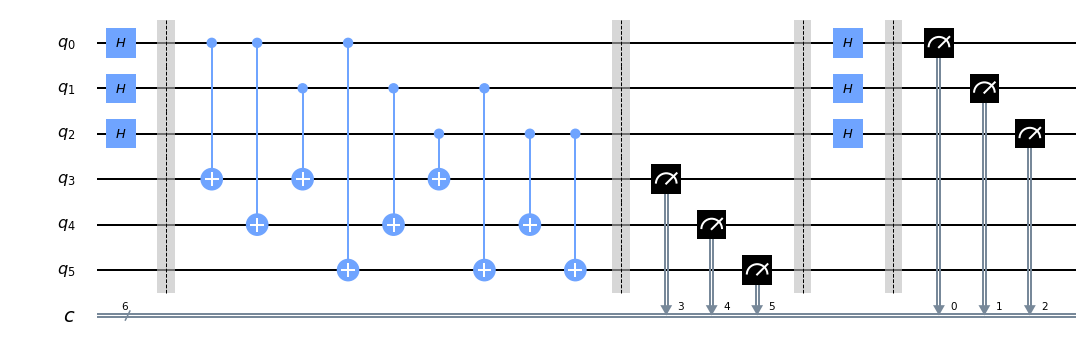

In [18]:
s = '110'
n = len(s)

circuit = QuantumCircuit(n*2, n*2)

for i in range(n):
    circuit.h(i)

circuit.barrier()

for i in range(n):
    for j in range(n):
        circuit.cx(i, n+j)

circuit.barrier()

for i in range(n):
    circuit.measure([n+i], [n+i])

circuit.barrier()
    
for i in range(n):
    circuit.h(i)

circuit.barrier()

for i in range(n):
    circuit.measure([i], [i])

circuit.draw(output='mpl')

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots = 1024).result()
counts = result.get_counts()
print(counts)

{'111111': 282, '111000': 227, '000000': 275, '000111': 240}
